In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [18]:
data_min = np.load('data_min.npz')
data_max = np.load('data_max.npz')

In [19]:
x_data_min = data_min['x_data_min']
vx_data_min = data_min['vx_data_min']

x_data_max = data_max['x_data_max']
vx_data_max = data_max['vx_data_max']

x_data_min = np.array(x_data_min)
vx_data_min = np.array(vx_data_min)

x_data_max = np.array(x_data_max)
vx_data_max = np.array(vx_data_max)

y_data_min = data_min['y_data_min']
vy_data_min = data_min['vy_data_min']

y_data_max = data_max['y_data_max']
vy_data_max = data_max['vy_data_max']

y_data_min = np.array(y_data_min)
vy_data_min = np.array(vy_data_min)

y_data_max = np.array(y_data_max)
vy_data_max = np.array(vy_data_max)


z_data_min = data_min['z_data_min']
vz_data_min = data_min['vz_data_min']

z_data_max = data_max['z_data_max']
vz_data_max = data_max['vz_data_max']

z_data_min = np.array(z_data_min)
vz_data_min = np.array(vz_data_min)

z_data_max = np.array(z_data_max)
vz_data_max = np.array(vz_data_max)

In [20]:
x1_train = np.column_stack((x_data_min, vx_data_min))
y1_train = np.column_stack((x_data_max, vx_data_max))

x2_train = np.column_stack((y_data_min, vy_data_min))
y2_train = np.column_stack((y_data_max, vy_data_max))

x3_train = np.column_stack((z_data_min, vz_data_min))
y3_train = np.column_stack((z_data_max, vz_data_max))

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 4952.6216 - mse: 4952.6216
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 4848.7935 - mse: 4848.7935
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4667.3540 - mse: 4667.3540
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 4358.8398 - mse: 4358.8398
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 3873.8113 - mse: 3873.8113
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 3223.0684 - mse: 3223.0684
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 2522.1055 - mse: 2522.1055
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 1908.3750 - mse: 1908.3750
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 1430.8922 - mse: 1430.8922
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 1100.7224 - mse: 1100.7224

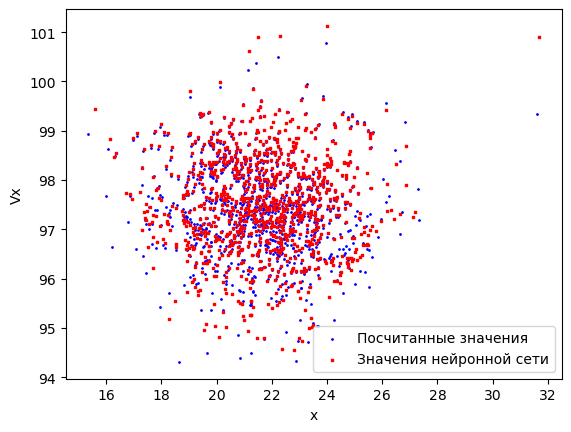

In [21]:
# Создаем модель нейронной сети
model1 = Sequential()

# Добавляем входной слой с 2 входами (начальная координата и скорость)
model1.add(Dense(units=16, activation='relu', input_dim=2))

# Добавляем скрытый слой с 32 нейронами и функцией активации ReLU
model1.add(Dense(units=32, activation='relu'))

# Добавляем выходной слой с 2 выходами (конечная координата и скорость)
model1.add(Dense(units=2, activation='linear'))

# Компилируем модель, указываем оптимизатор, функцию потерь и метрику
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Обучаем модель на тренировочных данных
model1.fit(x1_train, y1_train, epochs=200, batch_size=32)

# Оцениваем модель на тестовых данных
loss1, mse1 = model1.evaluate(x1_train, y1_train, batch_size=32)

# Делаем предсказания на новых данных
predictions1 = model1.predict(x1_train)

# График для y_train
plt.scatter(y1_train[:, 0], y1_train[:, 1], label='Посчитанные значения', color='blue', marker='o', s=1)
# График для predictions
plt.scatter(predictions1[:, 0], predictions1[:, 1], label='Значения нейронной сети', color='red', marker='s', s=1)

# Установка подписей осей и легенды
plt.xlabel('x')
plt.ylabel('Vx')
plt.legend()
plt.show()

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 11159.8936 - mse: 11159.8936
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 10520.8184 - mse: 10520.8184
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 9460.7842 - mse: 9460.7842
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7728.4932 - mse: 7728.4932
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 5373.5049 - mse: 5373.5049
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 2857.0496 - mse: 2857.0496
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1070.3451 - mse: 1070.3451
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 447.1267 - mse: 447.1267
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 374.6861 - mse: 374.6861
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 360.5088 - mse: 360.5088
E

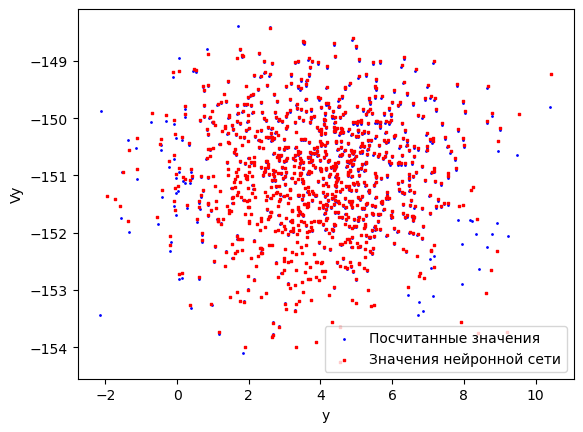

In [22]:
# Создаем модель второй нейронной сети
model2 = Sequential()

# Добавляем входной слой с 2 входами (начальная координата и скорость)
model2.add(Dense(units=16, activation='relu', input_dim=2))

# Добавляем скрытый слой с 32 нейронами и функцией активации ReLU
model2.add(Dense(units=32, activation='relu'))

# Добавляем выходной слой с 2 выходами (конечная координата и скорость)
model2.add(Dense(units=2, activation='linear'))

# Компилируем модель, указываем оптимизатор, функцию потерь и метрику
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Обучаем модель на тренировочных данных
model2.fit(x2_train, y2_train, epochs=200, batch_size=32)

# Оцениваем модель на тестовых данных
loss2, mse2 = model2.evaluate(x2_train, y2_train, batch_size=32)

# Делаем предсказания на новых данных
predictions2 = model2.predict(x2_train)

# График для y2_train
plt.scatter(y2_train[:, 0], y2_train[:, 1], label='Посчитанные значения', color='blue', marker='o', s=1)
# График для predictions
plt.scatter(predictions2[:, 0], predictions2[:, 1], label='Значения нейронной сети', color='red', marker='s', s=1)

# Установка подписей осей и легенды
plt.xlabel('y')
plt.ylabel('Vy')
plt.legend()
plt.show()

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 261.5021 - mse: 261.5021
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 20.6651 - mse: 20.6651
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 14.8916 - mse: 14.8916
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 14.3773 - mse: 14.3773
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 11.0217 - mse: 11.0217
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.9117 - mse: 7.9117
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 6.2959 - mse: 6.2959
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 4.9891 - mse: 4.9891
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 3.9292 - mse: 3.9292
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 3.0690 - mse: 3.0690
Epoch 11/200
32/32 [===========================

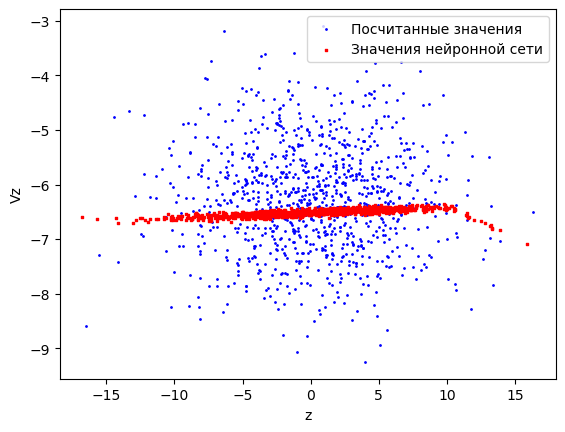

In [23]:
# Создаем модель третьей нейронной сети
model3 = Sequential()

# Добавляем входной слой с 2 входами (начальная координата и скорость)
model3.add(Dense(units=16, activation='relu', input_dim=2))

# Добавляем скрытый слой с 32 нейронами и функцией активации ReLU
model3.add(Dense(units=32, activation='relu'))

# Добавляем выходной слой с 2 выходами (конечная координата и скорость)
model3.add(Dense(units=2, activation='linear'))

# Компилируем модель, указываем оптимизатор, функцию потерь и метрику
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Обучаем модель на тренировочных данных
model3.fit(x3_train, y3_train, epochs=200, batch_size=32)

# Оцениваем модель на тестовых данных
loss3, mse3 = model3.evaluate(x3_train, y3_train, batch_size=32)

# Делаем предсказания на новых данных
predictions3 = model3.predict(x3_train)

# График для y3_train
plt.scatter(y3_train[:, 0], y3_train[:, 1], label='Посчитанные значения', color='blue', marker='o', s=1)
# График для predictions
plt.scatter(predictions3[:, 0], predictions3[:, 1], label='Значения нейронной сети', color='red', marker='s', s=1)

# Установка подписей осей и легенды
plt.xlabel('z')
plt.ylabel('Vz')
plt.legend()
plt.show()
